<a id='ContentList'></a>
# Content List

## Single to Single Generation 

### 1. [Text To Image](#TextToImage)

### 2. [Image To Text](#ImageToText)

### 3. [Text To Audio](#TextToAudio)

### 4. [Audio To Text](#AudioToText)

### 5. [Image To Audio](#ImageToAudio)

### 6. [Audio To Image](#AudioToImage)

### 7. [Text To Video](#TextToVideo)

## Multi-Conditioning Generation

### 1. [Text + Image + Audio To Image](#TextImageAudioToImage)

## Joint Multimodal Generation

### 1. [Text To Image+Text](#TextToImageText)

### 2. [Text To Video+Audio](#TextToVideoAudio)

<a id='LoadModel'></a>
# Load Model

In [1]:
"""
Load model from checkpoint.

For model inference:
The outputs are stored in an array as [number of output modalities, number of samples]
If I generate 4 samples of image + caption, the shape would be [2, 4]
"""

import os
from core.models.model_module_infer import model_module

model_load_paths = ['CoDi_encoders.pth', 'CoDi_text_diffuser.pth', 'CoDi_video_diffuser_8frames.pth']
inference_tester = model_module(data_dir='../', pth=model_load_paths)
inference_tester = inference_tester.cuda()
inference_tester = inference_tester.eval()



#######################
# Running in eps mode #
#######################



/home/v-terrantang/project/model_release/core/models/audioldm/audio/stft.py:42: FutureWarning: Pass size=1024 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  fft_window = pad_center(fft_window, filter_length)
/home/v-terrantang/project/model_release/core/models/audioldm/audio/stft.py:145: FutureWarning: Pass sr=16000, n_fft=1024, n_mels=64, fmin=0, fmax=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_basis = librosa_mel_fn(
/home/v-terrantang/anaconda3/envs/mmdif/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels


/home/v-terrantang/anaconda3/envs/mmdif/lib/python3.8/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


Load pretrained weight from ['CoDi_encoders.pth', 'CoDi_text_diffuser.pth', 'CoDi_video_diffuser_8frames.pth']


<a id='TextToImage'></a>
# Text To Image
### [Back to Menu](#ContentList)

Data shape for DDIM sampling is [[1, 4, 32, 32]], eta 0.0


DDIM Sampler: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 13.96it/s]


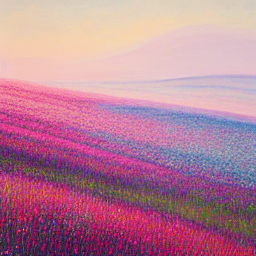

In [14]:
# Give a prompt
prompt = "A beautiful oil painting of a birch tree standing in a spring meadow with pink flowers, a distant mountain towers over the field in the distance. Artwork by Alena Aenami"

# Generate image
images = inference_tester.inference(
                xtype = ['image'],
                condition = [prompt],
                condition_types = ['text'],
                n_samples = 1, 
                image_size = 256,
                ddim_steps = 50)
images[0][0]

<a id='ImageToText'></a>
# Image To Text
### [Back to Menu](#ContentList)

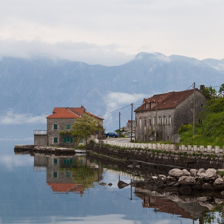

In [17]:
# Load an image input
from PIL import Image
im = Image.open('./assets/demo_files/house.jpeg').resize((224,224))
im

In [19]:
text = inference_tester.inference(
                xtype = ['text'],
                condition = [im],
                condition_types = ['image'],
                n_samples = 4, 
                ddim_steps = 50,
                scale = 7.5,)
text[0]

Data shape for DDIM sampling is [[4, 768]], eta 0.0


DDIM Sampler: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 19.17it/s]


['old lake and day near the seagway with a beautiful sight of the lake.',
 'castle with lake at sunset, with a kart and a mountain in the background',
 'castle near a lake with a castle with lake',
 'castle in lake with rocky mountains and at near lake']

<a id='TextToAudio'></a>
# Text To Audio
### [Back to Menu](#ContentList)

In [3]:
# Give a prompt
prompt = 'a train enters station.'

# Generate audio
audio_wave = inference_tester.inference(
                xtype = ['audio'],
                condition = [prompt],
                condition_types = ['text'],
                scale = 7.5,
                n_samples = 1, 
                ddim_steps = 50)[0]

# Play the audio
from IPython.display import Audio
Audio(audio_wave.squeeze(), rate=16000)

Data shape for DDIM sampling is [[1, 8, 256, 16]], eta 0.0


DDIM Sampler: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:13<00:00,  3.79it/s]


<a id='AudioToText'></a>
# Audio To Text
### [Back to Menu](#ContentList)

In [51]:
import torchaudio
import torch
from IPython.display import Audio

path = './assets/demo_files/train_sound.flac'

audio_wavs, sr = torchaudio.load(path)
audio_wavs = torchaudio.functional.resample(waveform=audio_wavs, orig_freq=sr, new_freq=16000).mean(0)[:int(16000 * 10.23)]
Audio(audio_wavs.squeeze(), rate=16000)

In [63]:
n_samples = 4
text = inference_tester.inference(
                xtype = ['text'],
                condition = [audio_wavs],
                condition_types = ['audio'],
                n_samples = n_samples, 
                ddim_steps = 50,
                scale = 7.5)
text

Data shape for DDIM sampling is [[4, 768]], eta 0.0


DDIM Sampler: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 19.09it/s]


[['the train..',
  'railroad train with a train.',
  'train blue train run.',
  'train car with another train of blue train car.']]

<a id='ImageToAudio'></a>
# Image To Audio
### [Back to Menu](#ContentList)

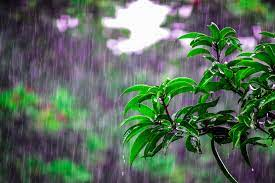

In [25]:
# Load an image
from PIL import Image
from core.common.utils import regularize_image
im = Image.open('./assets/demo_files/rain_on_tree.jpg')
im

In [26]:
# Generate audio
audio_wave = inference_tester.inference(
                xtype = ['audio'],
                condition = [im],
                condition_types = ['image'],
                scale = 7.5,
                n_samples = 1, 
                ddim_steps = 50)[0]

# Play audio
from IPython.display import Audio
Audio(audio_wave.squeeze(), rate=16000)

Data shape for DDIM sampling is [[1, 8, 256, 16]], eta 0.0


DDIM Sampler: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:13<00:00,  3.75it/s]


<a id='AudioToImage'></a>
# Audio To Image
### [Back to Menu](#ContentList)

In [39]:
# Load input audio andplay
import torchaudio
import torch
from IPython.display import Audio
pad_time = 10.23

path = './assets/demo_files/wind_chimes.wav'

audio_wavs, sr = torchaudio.load(path)
audio_wavs = torchaudio.functional.resample(waveform=audio_wavs, orig_freq=sr, new_freq=16000).mean(0)[:int(16000 * pad_time)]
padding = torch.zeros([int(16000 * pad_time) - audio_wavs.size(0)])
audio_wavs = torch.cat([audio_wavs, padding], 0)

from IPython.display import Audio
Audio(path, rate=16000)


Data shape for DDIM sampling is [[1, 4, 32, 32]], eta 0.0


DDIM Sampler: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 13.79it/s]


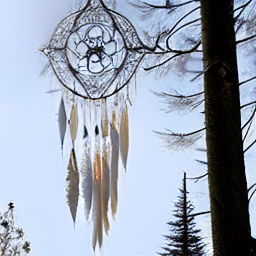

In [41]:
import torch

# Generate image
images = inference_tester.inference(
                xtype = ['image'],
                condition = [audio_wavs],
                condition_types = ['audio'],
                scale = 7.5,
                image_size = 256,
                ddim_steps = 50)
images[0][0]

<a id='TextToVideo'></a>
# Text To Video
### [Back to Menu](#ContentList)

In [48]:
# Give A Prompt
prompt = 'a beautiful waterfall.'

n_samples = 1
outputs = inference_tester.inference(
                ['video'],
                condition = [prompt],
                condition_types = ['text'],
                n_samples = 1,
                image_size = 256,
                ddim_steps = 50,
                num_frames = 8,
                scale = 7.5)

video = outputs[0][0]

Data shape for DDIM sampling is [[1, 4, 8, 32, 32]], eta 0.0


DDIM Sampler: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:22<00:00,  2.18it/s]


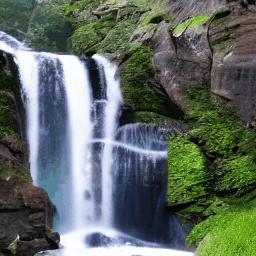

In [49]:
# Visual video as gif
from PIL import Image
frame_one = video[0]
path = "./generated_text2video.gif"
frame_one.save(path, format="GIF", append_images=video[1:],
               save_all=True, duration=2000/len(video), loop=0)

from IPython import display 
from IPython.display import Image
Image(data=open(path,'rb').read(), format='png')

<a id='TextImageAudioToImage'></a>
#  Text + Audio To Image

### [Back to Menu](#ContentList)

In [67]:
# Load Audio Inputs
import torchaudio
import torch
from IPython.display import Audio

path = './assets/demo_files/sea_waves.wav'

audio_wavs, sr = torchaudio.load(path)
audio_wavs = torchaudio.functional.resample(waveform=audio_wavs, orig_freq=sr, new_freq=16000).mean(0)[:int(16000 * 10.23)]
Audio(audio_wavs.squeeze(), rate=16000)


In [68]:
# Give A Prompt
prompt = 'dawn, dawn scenery, sunset, beautiful lighting.'


Data shape for DDIM sampling is [[1, 4, 32, 32]], eta 0.0


DDIM Sampler: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 14.18it/s]


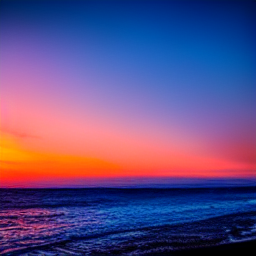

In [72]:
# Generate image
# Mix weight here is the weighting ratio of the condition inputs

n_samples = 1
images = inference_tester.inference(
                ['image'],
                condition = [audio_wavs, prompt],
                condition_types = ['audio', 'text'],
                n_samples = n_samples,
                image_size = 256,
                mix_weight = {'audio': 1, 'text': 2}, )

images[0][0]

<a id='TextToImageText'></a>
#  Text To Image + Text

### [Back to Menu](#ContentList)

In [39]:
# Give A Prompt
prompt = 'deep diving in coral reef underwater.'

outputs = inference_tester.inference(
                ['image', 'text'],
                condition = [prompt],
                condition_types = ['text'],
                n_samples = 1,
                image_size = 256)

image, text = outputs

Data shape for DDIM sampling is [[1, 4, 32, 32], [1, 768]], eta 0.0


DDIM Sampler: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:08<00:00,  6.15it/s]


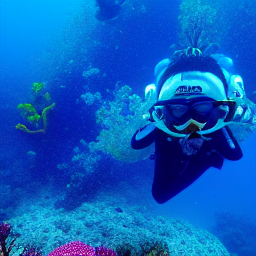

In [40]:
image[0]

In [41]:
text[0]

'blue girl diving on the beach blue water.'

<a id='TextToVideoAudio'></a>
#  Text To Video + Audio

### [Back to Menu](#ContentList)

In [28]:
# Give A Prompt
prompt = 'walking inside a beautiful forest, nature, birds.'


n_samples = 1
outputs = inference_tester.inference(
                ['video', 'audio'],
                condition = [prompt],
                condition_types = ['text'],
                n_samples = 1,
                image_size = 256,
                ddim_steps = 50,
                num_frames = 8,
                scale = 7.5)


Data shape for DDIM sampling is [[1, 4, 8, 32, 32], [1, 8, 256, 16]], eta 0.0


DDIM Sampler: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:58<00:00,  1.17s/it]


In [30]:
video, audio_wave = outputs

from IPython.display import Audio
Audio(audio_wave[0].squeeze(), rate=16000)

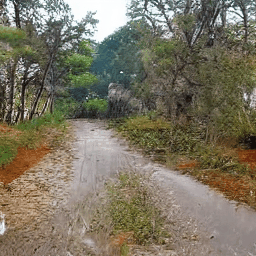

In [31]:
# Visual video as gif
video = video[0]
from PIL import Image
frame_one = video[0]
path = "./generated_video.gif"
frame_one.save(path, format="GIF", append_images=video[1:],
               save_all=True, duration=2000/len(video), loop=0)

from IPython import display 
from IPython.display import Image
Image(data=open(path,'rb').read(), format='png')